In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [23]:
li = []
li.append(pd.read_csv(r"./articles1.csv"))
li.append(pd.read_csv(r"./articles2.csv"))
li.append(pd.read_csv(r"./articles3.csv"))

df = pd.concat(li)
df.head()

,category,lead,text,author,title
0,نمایشگاه خودرو ژنو,مدل کوپه از سری GT، اولین خودروی اختصاصی با تو...,بعد از چند ماه انتظار و تماشای تصاویر جاسوسی ا...,A,مرسدس بنز AMG GT نسخه‌ی سدان معرفی شد
1,نمایشگاه خودرو ژنو,خودروی مفهومی بی‌ام‌و M8 گرن‌ کوپه در نمایشگاه...,خودروی مفهومی بی‌ام‌و M8 گرن‌ کوپه معنای حروف ...,B,خودروی مفهومی بی‌ ام‌ و M8 گرن‌کوپه معرفی شد
2,نمایشگاه خودرو ژنو,برابوس خود را برای نمایش دو مدل سدان و کوپه از...,برابوس (Brabus) یکی از بزرگ‌ترین شرکت‌های تیون...,B,سدان و کوپه مرسدس AMG S63 با تیونینگ برابوس مع...
3,نمایشگاه خودرو ژنو,در آستانه نمایشگاه خودروی ژنو ۲۰۱۸، استون مارت...,برند لاگوندا (Lagonda) هنوز زنده است و استون م...,B,خودروی مفهومی الکتریکی استون مارتین لاگوندا وی...
4,نمایشگاه خودرو ژنو,نسخه هیبریدی خودروی بنتلی بنتایگا مدل ۲۰۱۹ با ...,به نظر می‌رسد که بنتلی، ترکیب رانندگی مدرن و ت...,B,بنتلی بنتایگا پلاگین هیبریدی مدل 2019 معرفی شد


In [24]:
df.category.value_counts().head(7)

موبایل                  8535
فناوری                  8476
اخبار خودرو             2970
نرم افزار و اپلیکیشن    2632
فناوری ایران            2299
پزشکی و سلامت           1267
سیستم عامل              1217
Name: category, dtype: int64

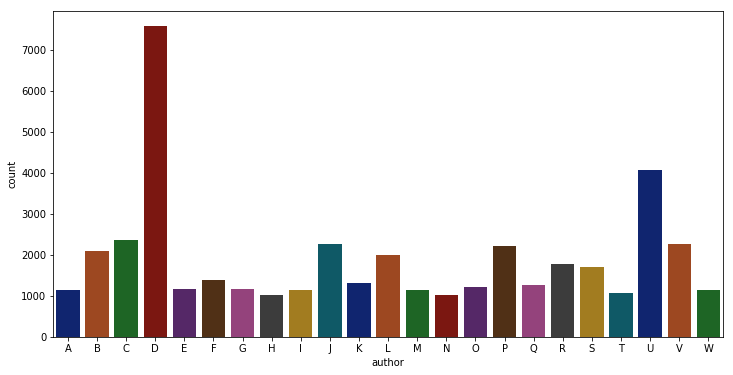

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(df.author, palette="dark")
plt.show()

In [26]:
df["lead_len"] = df.lead.apply(lambda x: len(x.split()))
df["title_len"] = df.title.apply(lambda x: len(x.split()))
df["text_len"] = df.text.apply(lambda x: len(x.split()))

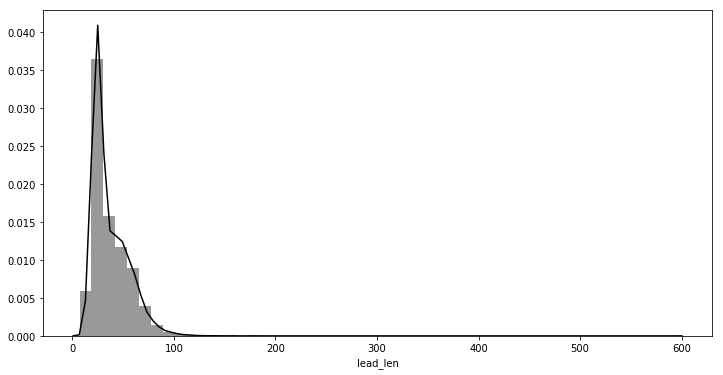

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(df["lead_len"], color="k")
plt.show()

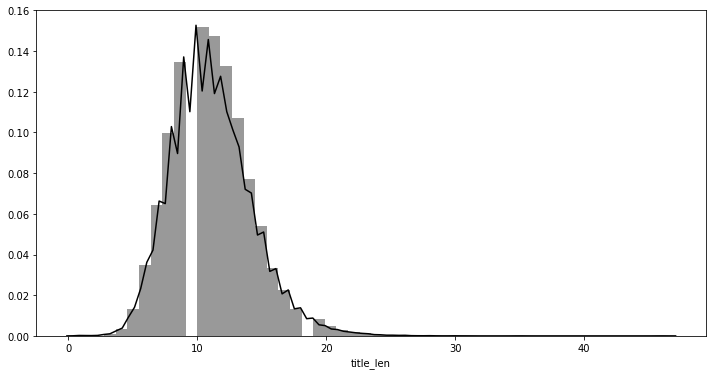

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(df["title_len"], color="k")
plt.show()

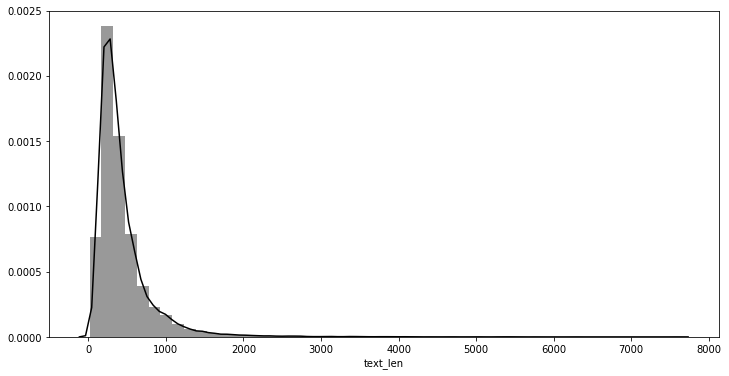

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(df["text_len"], color="k")
plt.show()

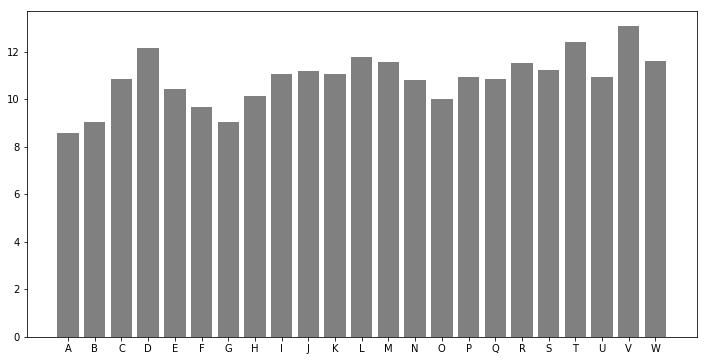

In [30]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().title_len.values, color="gray")
plt.show()

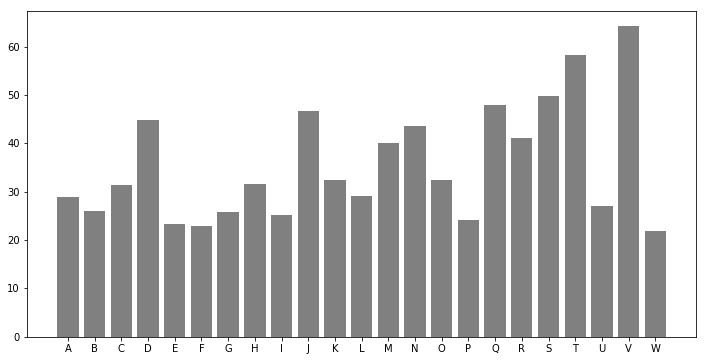

In [31]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().lead_len.values, color="gray")
plt.show()

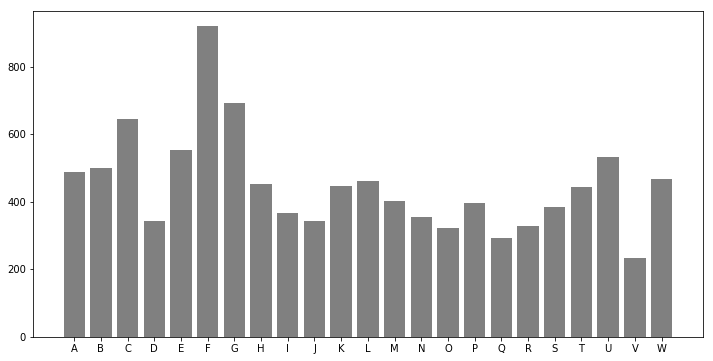

In [32]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().text_len.values, color="gray")
plt.show()

In [ ]:
df["va_count"] = df.text.apply(lambda x: len(re.findall(" و " , x)))
df["be_count"] = df.text.apply(lambda x: len(re.findall(" به " , x)))
df["dar_count"] = df.text.apply(lambda x: len(re.findall(" در " , x)))
df["az_count"] = df.text.apply(lambda x: len(re.findall(" از " , x)))
df["har_count"] = df.text.apply(lambda x: len(re.findall(" هر " , x)))
df["ba_count"] = df.text.apply(lambda x: len(re.findall(" با " , x)))
df["ra_count"] = df.text.apply(lambda x: len(re.findall(" را " , x)))
df["ke_count"] = df.text.apply(lambda x: len(re.findall(" که " , x)))
df["ta_count"] = df.text.apply(lambda x: len(re.findall(" تا " , x)))

In [ ]:
df["va_count"] = df["va_count"] / df.text_len
df["be_count"] = df["be_count"] / df.text_len
df["dar_count"] = df["dar_count"] / df.text_len
df["az_count"] = df["az_count"] / df.text_len
df["har_count"] = df["har_count"] / df.text_len
df["ba_count"] = df["ba_count"] / df.text_len
df["ra_count"] = df["ra_count"] / df.text_len
df["ke_count"] = df["ke_count"] / df.text_len
df["ta_count"] = df["ta_count"] / df.text_len

In [15]:
df.groupby("author").mean()[["va_count", "be_count", "dar_count", "az_count", "har_count",
                             "ba_count", "ra_count", "ke_count", "ta_count"]].head(5)

,va_count,be_count,dar_count,az_count,har_count,ba_count,ra_count,ke_count,ta_count
author,,,,,,,,,
A,0.039407,0.021736,0.030929,0.022274,0.001098,0.019794,0.009306,0.013215,0.006381
B,0.032398,0.024155,0.030711,0.023023,0.001506,0.014913,0.013508,0.017489,0.004463
C,0.031860,0.023795,0.034729,0.026352,0.001589,0.014482,0.021318,0.019059,0.004136
D,0.022372,0.024635,0.039582,0.034199,0.001430,0.016996,0.021140,0.021850,0.004809
E,0.042355,0.021811,0.032454,0.022675,0.001317,0.013278,0.013551,0.014410,0.004639


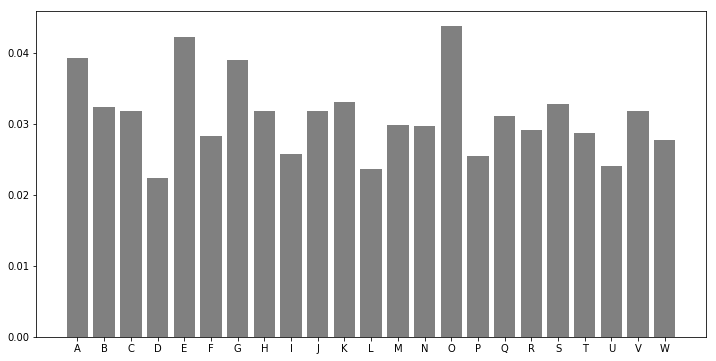

In [16]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().va_count.values, color="gray")
plt.show()

In [17]:
df["samsung_count"] = df.text.apply(lambda x: len(re.findall(" ساسمونگ " , x)))
df["huawei_count"] = df.text.apply(lambda x: len(re.findall(" هواوی " , x)))
df["apple_count"] = df.text.apply(lambda x: len(re.findall(" اپل " , x)))
df["microsoft_count"] = df.text.apply(lambda x: len(re.findall(" مایکروسافت " , x)))
df["mobile_count"] = df.text.apply(lambda x: len(re.findall(" موبایل " , x)))
df["labtop_count"] = df.text.apply(lambda x: len(re.findall(" لپ تاپ " , x)))
df["physics_count"] = df.text.apply(lambda x: len(re.findall(" فیزیک " , x)))
df["asus_count"] = df.text.apply(lambda x: len(re.findall(" ایسوس " , x)))
df["machine_count"] = df.text.apply(lambda x: len(re.findall(" خودرو " , x)))

In [18]:
df["samsung_count"] = df["samsung_count"] / df.text_len
df["huawei_count"] = df["huawei_count"] / df.text_len
df["apple_count"] = df["apple_count"] / df.text_len
df["microsoft_count"] = df["microsoft_count"] / df.text_len
df["mobile_count"] = df["mobile_count"] / df.text_len
df["labtop_count"] = df["labtop_count"] / df.text_len
df["physics_count"] = df["physics_count"] / df.text_len
df["asus_count"] = df["asus_count"] / df.text_len
df["machine_count"] = df["machine_count"] / df.text_len

In [19]:
df.groupby("author").mean()[["samsung_count", "huawei_count", "apple_count", "microsoft_count", "mobile_count",
                             "labtop_count", "physics_count", "asus_count", "machine_count"]].head(5)

,samsung_count,huawei_count,apple_count,microsoft_count,mobile_count,labtop_count,physics_count,asus_count,machine_count
author,,,,,,,,,
A,0.000000e+00,0.000000e+00,0.000052,0.000005,0.000011,0.000000e+00,0.000000,0.000000e+00,0.006973
B,0.000000e+00,2.013145e-07,0.000096,0.000013,0.000020,6.437194e-07,0.000004,0.000000e+00,0.006186
C,2.507965e-07,5.809246e-04,0.001857,0.000996,0.000294,5.305588e-06,0.000020,9.814086e-05,0.000078
D,0.000000e+00,3.869269e-04,0.003370,0.001365,0.000703,6.296618e-06,0.000010,1.143974e-04,0.000503
E,0.000000e+00,4.161642e-05,0.000106,0.000003,0.000838,0.000000e+00,0.000021,6.986714e-07,0.000273


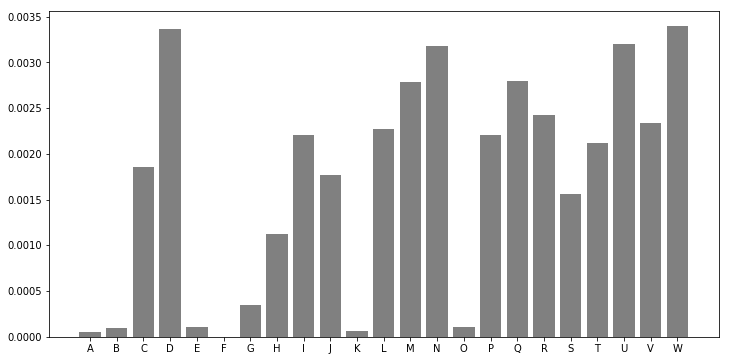

In [20]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().apple_count.values, color="gray")
plt.show()

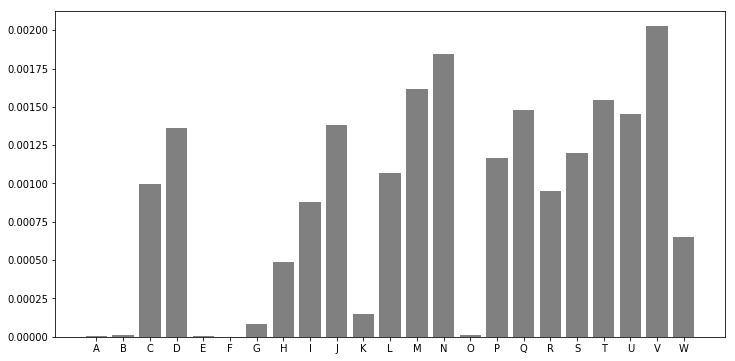

In [21]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().microsoft_count.values, color="gray")
plt.show()

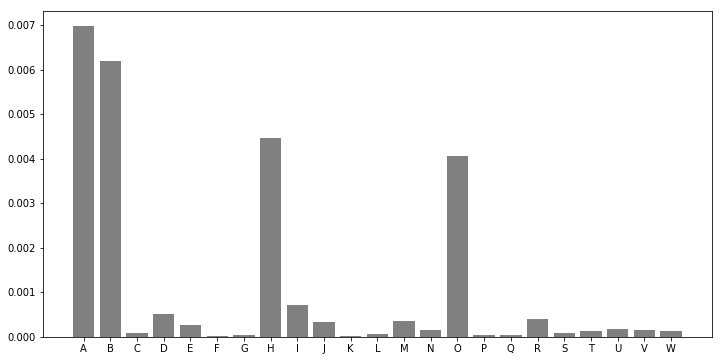

In [22]:
plt.figure(figsize=(12,6))
plt.bar(df.groupby("author").mean().index , df.groupby("author").mean().machine_count.values, color="gray")
plt.show()